<a href="https://colab.research.google.com/github/juyounLee/Tensorflow2.0/blob/main/5_1_binary_classfication_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# load the data

red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]
   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9   

In [2]:
# bind two wine datasets

red['type'] = 0     # red or wine인지 추가
white['type'] = 1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red, white])
print(wine.describe())

   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.4              0.70          0.0  ...      9.4        5     0
1            7.8              0.88          0.0  ...      9.8        5     0

[2 rows x 13 columns]
   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.0              0.27         0.36  ...      8.8        6     1
1            6.3              0.30         0.34  ...      9.5        6     1

[2 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        7.215307          0.339666  ...     5.818378     0.753886
std         1.296434          0.164636  ...     0.873255     0.430779
min         3.800000          0.080000  ...     3.000000     0.000000
25%         6.400000          0.230000  ...     5.000000     1.000000
50%         7.000000          0.290000  ...     6.000000     1.000000
75

In [3]:
print(wine['type'].value_counts())

1    4898
0    1599
Name: type, dtype: int64


In [4]:
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [5]:
# normalize the data

wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
0       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0
1       0.330579          0.533333     0.000000  ...  0.260870  0.333333   0.0
2       0.330579          0.453333     0.024096  ...  0.260870  0.333333   0.0
3       0.611570          0.133333     0.337349  ...  0.260870  0.500000   0.0
4       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0

[5 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        0.282257          0.173111  ...     0.469730     0.753886
std         0.107143          0.109758  ...     0.145543     0.430779
min         0.000000          0.000000  ...     0.000000     0.000000
25%         0.214876          0.100000  ...     0.333333     1.000000
50%         0.264463          0.140000  ...     0.500000     1.000000
75%         0

In [6]:
# shuffle the red and white data (비율을 동등하게 맞추기 위해)

wine_shuffle = wine_norm.sample(frac=1) # frac=1; 100% data 사용
print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy()

      fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
4392       0.198347          0.113333     0.265060  ...  0.173913  0.333333   1.0
1260       0.396694          0.370000     0.409639  ...  0.188406  0.333333   0.0
3757       0.223140          0.120000     0.204819  ...  0.391304  0.333333   1.0
656        0.429752          0.126667     0.210843  ...  0.478261  0.500000   1.0
4410       0.157025          0.106667     0.283133  ...  0.251208  0.333333   1.0

[5 rows x 13 columns]


In [7]:
# split train and test data

import tensorflow as tf

train_idx = int(len(wine_np)*0.8)
train_X, train_y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]

print(train_X[0])
print(train_y[0])
print(test_X[0])
print(test_y[0])

[0.19834711 0.11333333 0.26506024 0.23312883 0.07973422 0.13194444
 0.37096774 0.21071911 0.3255814  0.16292135 0.17391304 0.33333333]
1.0
[0.58677686 0.16       0.31325301 0.01840491 0.20431894 0.05555556
 0.0875576  0.19722383 0.43410853 0.30898876 0.50724638 0.5       ]
0.0


In [8]:
# one-Hot Encoding

train_y = tf.keras.utils.to_categorical(train_y, num_classes=2)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=2)

In [9]:
# build the model

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
                             tf.keras.layers.Dense(units=24, activation='relu'),
                             tf.keras.layers.Dense(units=12, activation='relu'),
                             tf.keras.layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.07),
              loss = 'categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(train_X, train_y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 1s 6ms/step - loss: 0.1249 - accuracy: 0.9507 - val_loss: 0.0375 - val_accuracy: 0.9892
Epoch 2/25
122/122 [==============================] - 0s 4ms/step - loss: 0.0624 - accuracy: 0.9854 - val_loss: 0.0752 - val_accuracy: 0.9746
Epoch 3/25
122/122 [==============================] - 0s 4ms/step - loss: 0.0536 - accuracy: 0.9872 - val_loss: 0.0609 - val_accuracy: 0.9800
Epoch 4/25
122/122 [==============================] - 0s 4ms/step - loss: 0.0480 - accuracy: 0.9869 - val_loss: 0.0318 - val_accuracy: 0.9915
Epoch 5/25
122/122 [==============================] - 0s 4ms/step - loss: 0.0643 - accuracy: 0.9836 - val_loss: 0.0748 - val_accuracy: 0.9692
Epoch 6/25
122/122 [==============================] - 0s 4ms/step - loss: 0.0431 - accuracy: 0.9885 - val_loss: 0.0258 - val_accuracy: 0.9915
Epoch 7/25
122/122 [==============================] - 0s 4ms/step - loss: 0.0424 - accuracy: 0.9879 - val_loss: 0.0315 - val_accuracy: 0.9877
Epoch 

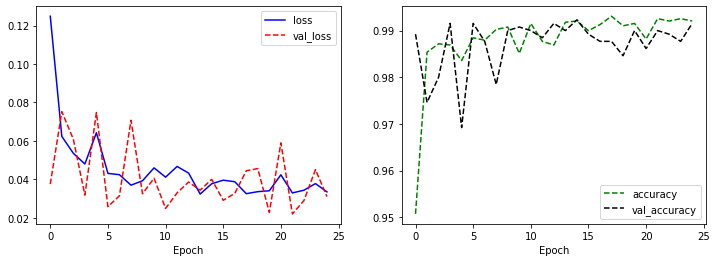

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g--', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

In [12]:
model.evaluate(test_X, test_y)

41/41 [==============================] - 0s 2ms/step - loss: 0.0401 - accuracy: 0.9923


[0.040064651519060135, 0.9923076629638672]